In [9]:
from constant import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import time
import cPickle
import argparse
import math
import random
from sklearn.manifold import TSNE
from sklearn import decomposition

#### Parameters ####
model_type_strs = ['every'] # len = 1
model_names = ['0', 'all'] # len = 2
test_type_strs = ['crop'] # len = 1
test_names = ['50'] # len = 1
#test_names = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
####################

class_sum = 100
# vector_sum = 1000 # not uniform for 'crop'
dim_sum = 100 # == class_sum

vector_data = {}
for model_type_str in model_type_strs:
    for test_type_str in test_type_strs:
        # Load given config.
        for model_name in model_names:
            for test_name in test_names:
                config_key = (model_type_str, model_name, test_type_str, test_name)
                vector_data[config_key] = None
                with open('{}img2vec/vectors_{}_{}_{}_{}.pickle'\
                          .format(result_root, model_type_str, model_name, test_type_str, test_name)) as f:
                    vector_data[config_key] = cPickle.load(f)
                    print 'vectors_{}_{}_{}_{}.pickle loaded.'.format(model_type_str, model_name, test_type_str, test_name)
        # Load highest possible config.
        model_name = '0'
        test_name = '0'
        config_key = (model_type_str, model_name, test_type_str, test_name)
        with open('{}img2vec/vectors_{}_{}_{}_{}.pickle'\
                  .format(result_root, model_type_str, model_name, test_type_str, test_name)) as f:
            vector_data[config_key] = cPickle.load(f)
            print 'vectors_{}_{}_{}_{}.pickle loaded.'.format(model_type_str, model_name, test_type_str, test_name)


vectors_every_0_crop_50.pickle loaded.
vectors_every_all_crop_50.pickle loaded.
vectors_every_0_crop_0.pickle loaded.


every, 0
170.4 & 

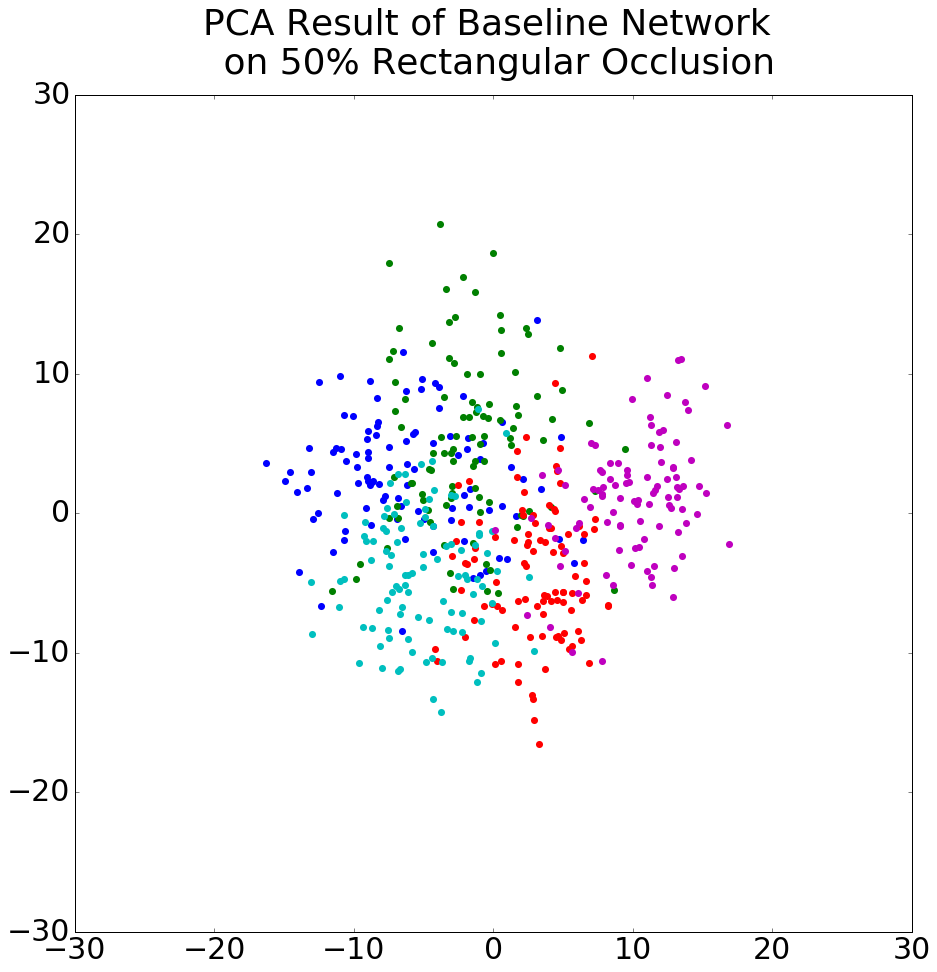

every, all
188.8 & 

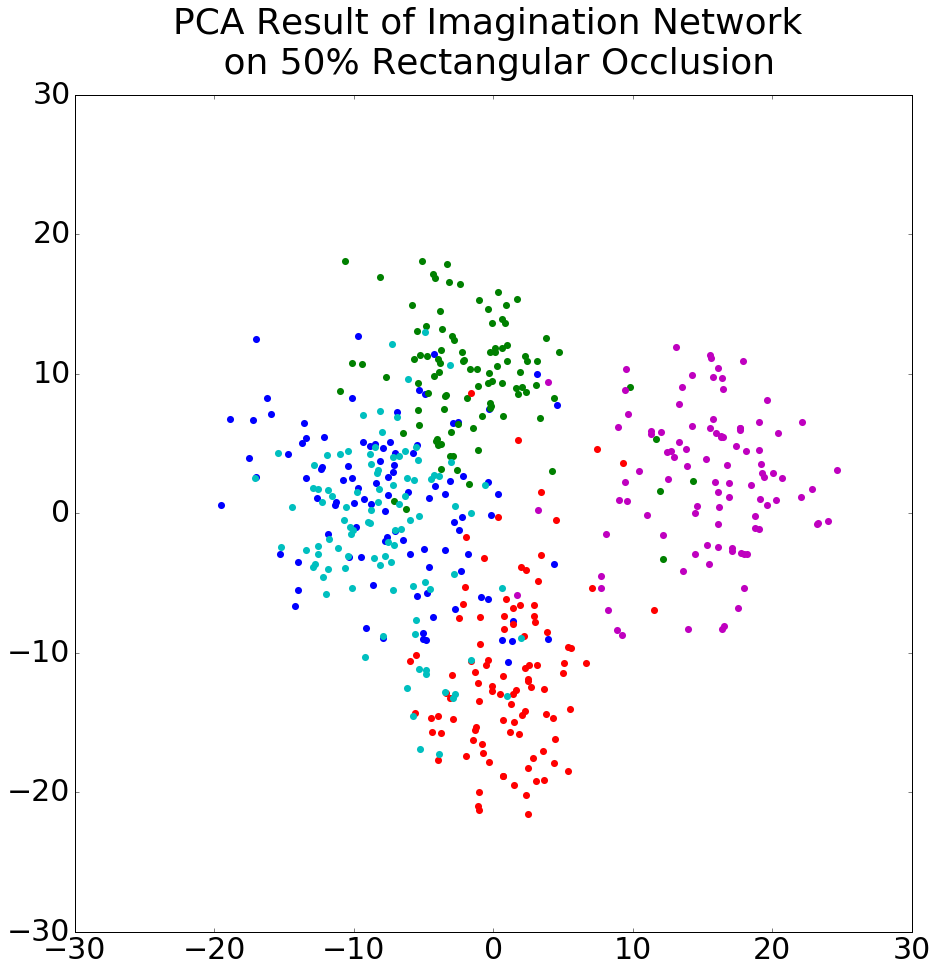

done


In [10]:
plt.rcParams['figure.figsize'] = (15, 15)
matplotlib.rcParams.update({'font.size': 30})


#100
#color_for_class = ["#845d1f", "#5982f0", "#a6bc3a", "#432b8a", "#88d76a", "#514cb5", "#d1b83c", "#6b62cc", "#339331", "#d762c4", "#48d081", "#9f3694", "#5dae50", "#773493", "#7fb142", "#9e7ee9", "#336f17", "#e383e0", "#9cd377", "#7b176a", "#69bd73", "#ab3387", "#51bf85", "#de4782", "#4bcda9", "#bc2757", "#36dee6", "#ae301f", "#379ee7", "#d48122", "#406ac1", "#eaaa43", "#524a9e", "#ae9620", "#ab61c4", "#748b22", "#3f2068", "#bdbe59", "#2f4083", "#ba881a", "#6e8de9", "#e17138", "#2b5a9b", "#e89a4f", "#636bb4", "#d8b058", "#ad83dd", "#719d47", "#dd57a2", "#3a7f3b", "#d28bdb", "#104507", "#f7a5e5", "#2c5d1f", "#e679ba", "#258e62", "#a3235e", "#93c680", "#682768", "#c0ce7a", "#834a92", "#8b9f4d", "#ac5798", "#6b9d5a", "#7a1e54", "#8d7e1f", "#7b95de", "#ad4f11", "#cfa1e9", "#606a1c", "#d383c2", "#a5701f", "#976cb1", "#d17c37", "#ad4c80", "#b3a75c", "#6f193d", "#c49857", "#da82b1", "#6e2b0a", "#df6a92", "#6e0e09", "#e68397", "#6d0f1a", "#dc8e5a", "#811e37", "#e97150", "#ab5170", "#a74d26", "#e15e7b", "#9c4e34", "#e25968", "#de886a", "#b32e43", "#e37160", "#963237", "#da7270", "#992e24", "#b14b5e", "#d34447"]
#20
#color_for_class = ["#d563a5", "#79d37f", "#4c2a7a", "#acc853", "#6c69d2", "#cf9e2f", "#5085e0", "#b8943c", "#be62c2", "#51ca96", "#872962", "#3fe0d8", "#be4748", "#5a8432", "#c382ca", "#d3c878", "#7182cb", "#c35a2d", "#c24c6e", "#a76737"]
#10
#color_for_class = ["#89722d","#6978d2","#879325","#4c2a79","#428d47","#b057a9","#c07425","#b5446e","#c25036","#ae4540"]
#5
color_for_class = ['b', 'g', 'r', 'c', 'm']

#sample_mask_class = range(100)
#sample_mask_class = [37, 7, 48, 53, 82, 13, 26, 6, 49, 55]
sample_mask_class = [94, 1, 48, 98, 65]


#sample_mask_vector = [4, 6, 8, 9, 12, 14, 17, 19, 25, 37, 41, 46, 54, 57, 58, 62, 65, 68, 70, 86, 93, 100, 108, 137, 141, 144, 146, 155, 158, 162, 168, 171, 176, 177, 181, 184, 194, 196, 199, 204, 210, 215, 217, 218, 226, 229, 231, 236, 238, 239, 246, 248, 249, 281, 287, 304, 308, 309, 310, 311, 312, 318, 328, 331, 339, 340, 341, 346, 355, 361, 362, 379, 383, 384, 386, 387, 388, 389, 394, 399, 400, 404, 431, 440, 442, 447, 450, 452, 453, 462, 466, 473, 477, 481, 483, 484, 489, 490, 495, 498, 499, 501, 502, 504, 506, 507, 516, 517, 521, 523, 524, 529, 536, 537, 538, 543, 544, 545, 576, 577, 590, 592, 596, 599, 603, 604, 610, 615, 616, 618, 620, 621, 628, 634, 636, 641, 645, 647, 648, 654, 655, 660, 661, 662, 665, 675, 682, 685, 689, 693, 694, 695, 697, 702, 703, 705, 706, 708, 709, 713, 722, 723, 724, 727, 733, 735, 737, 752, 756, 763, 765, 773, 782, 788, 795, 797, 833, 837, 847, 848, 857, 862, 870, 871, 874, 875, 889, 890, 894, 906, 907, 908, 910, 913, 916, 927, 934, 975, 979, 997]
sample_mask_vector = range(100)

accuracy = {}
intraclass_dis = {}
interclass_dis = {}
mean = {}
std = {}
vec = {}
     

def distance(x, y):
    dis = np.sqrt(np.sum((x - y) ** 2))
    return dis
def distance_sq(x, y):
    dis = np.sum((x - y) ** 2)
    return dis

model_name_to_desc = {'0': 'Baseline', 'all': 'Imagination'}
test_type_str_to_name = {'crop': 'Rectangular', 'aperture': 'Aperture', 'crop_obj': 'Real Object'}


for model_type_str in model_type_strs:
    for model_name in model_names:
        sys.stdout.write('{}, {}\n'.format(model_type_str, model_name))
        for test_type_str in test_type_strs:
            for test_name in test_names:
                config_key = (model_type_str, model_name, test_type_str, test_name)
                
                accuracy[config_key] = np.zeros(class_sum)
                intraclass_dis[config_key] = np.zeros(class_sum)
                vec[config_key] = [[] for i in range(class_sum)]
                mean[config_key] = [None for i in range(class_sum)]
                std[config_key] = [None for i in range(class_sum)]
                
                for label in range(class_sum):
                    # Collect vec and accuracy info.
                    accuracy[config_key][label] = 0.0
                    for i in range(len(vector_data[config_key][label])):
                        vector, predict_id, index_in_lmdb = vector_data[config_key][label][i]
                        if label == predict_id:
                            accuracy[config_key][label] += 1
                        vec[config_key][label].append(vector)
                    accuracy[config_key][label] /= len(vector_data[config_key][label])
                    
                    # Statistical analysis.
                    mean[config_key][label] = np.mean(vec[config_key][label], axis=0)
                    std[config_key][label] = np.std(vec[config_key][label], axis=0)
                    
                    intraclass_dis[config_key][label] = 0
                    for v in vec[config_key][label]:
                        intraclass_dis[config_key][label] += distance_sq(mean[config_key][label], v)
                    intraclass_dis[config_key][label] /= len(vec[config_key][label])

                    '''
                    # Plots.
                    
                    # Distribution of probability.
                    fig = plt.figure()
                    ax = plt.gca()
                    ax.set_xlim([-10, 110])
                    ax.set_ylim([-10, 15])
                    plt.errorbar(range(class_sum), mean[config_key][label], yerr=std[config_key][label], fmt='-o')
                    plt.title('{}_{}_{}_{}_{} accuracy: {}'\
                                .format(label, model_type_str, model_name, test_type_str, test_name, accuracy[config_key][label]))
                    #plt.show()
                    fig.savefig('{}img2vec/plots/{}_{}_{}_{}_{}.png'\
                                .format(result_root, model_type_str, test_type_str, test_name, label, model_name))
                    plt.close()
                    '''

                    '''
                    X = []
                    c = []
                    for i in range(len(vector_data[config_key][label])):
                        vector, predict_id, index_in_lmdb = vector_data[config_key][label][i]
                        X.append(vector)
                        if predict_id == label:
                            c.append((1, 1, 1))
                        else:
                            c.append((0.1, 0.1, 0.1))
                    X = np.array(X)
                    '''

                    #plt.scatter(X[:, 0], X[:, 1], c=c)
                    #plt.show()

                    
                #print "{} intra-class distance mean: {}".format(config_key, intraclass_dis[config_key].mean())
                    
                # Inter-class distance.
                interclass_dis[config_key] = 0
                mean_of_mean = np.mean(mean[config_key], axis=0)
                for mean_vec in mean[config_key]:
                    interclass_dis[config_key] += distance_sq(mean_vec, mean_of_mean)
                interclass_dis[config_key] /= len(mean[config_key])
                #print "{} inter-class distance mean: {}".format(config_key, interclass_dis[config_key])
                #sys.stdout.write("{:.1f} & ".format(interclass_dis[config_key]))
                
                sys.stdout.write("{:.1f} & ".format(intraclass_dis[config_key].mean()))
                
                #print '{} LDA: {}'.format(config_key, interclass_dis[config_key] / intraclass_dis[config_key].mean())
                #sys.stdout.write('\\textbf{{{:.2f}}} & '.format(interclass_dis[config_key] / intraclass_dis[config_key].mean()))
                
                        
                color = []
                sampled_vec = []
                line_width = []
                marker = []
                # Color by predict_label == original_label.
                for i, label in enumerate(sample_mask_class):
                    for vec_index in sample_mask_vector:
                        sampled_vec.append(vector_data[config_key][label][vec_index][0])
                        if vector_data[config_key][label][vec_index][1] == label:
                            #color.append(color_for_class[i])
                            color.append(color_for_class[i])
                            line_width.append(0)
                            marker.append('o')
                            #marker.append(matplotlib.markers.MarkerStyle.markers.keys()[i])
                        else:
                            #color.append('black')
                            color.append(color_for_class[i])
                            line_width.append(1)
                            marker.append('o')
                            #marker.append(matplotlib.markers.MarkerStyle.markers.keys()[i])
                '''
                # t-SNE
                X_tsne = TSNE().fit_transform(sampled_vec)
                ax = plt.gca()
                ax.set_xlim([-30, 30])
                ax.set_ylim([-30, 30])
                for i in range(len(X_tsne)):
                    #plt.scatter([X_tsne[i][0]], [X_tsne[i][1]], c = color[i], marker = marker[i], s = 42)
                    plt.scatter([X_tsne[i][0]], [X_tsne[i][1]], c = color[i], \
                                marker = marker[i], s = 100, lw = 0)
                #plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = color, \
                #            marker = marker.next(), s = 50, lw = 0)
                plt.show()
                plt.close()
                '''
                
                # PCA.
                pca = decomposition.PCA(n_components=2)
                pca.fit(sampled_vec)
                X = pca.transform(sampled_vec)
                plt.xlim([-30, 30])
                plt.ylim([-30, 30])
                for i in range(len(X)):
                    plt.scatter([X[i][0]], [X[i][1]], c = color[i], marker = 'o', s = 50, lw = 0)
                plt.title('PCA Result of {} Network \n on {}% {} Occlusion'\
                          .format(model_name_to_desc[model_name], test_name, test_type_str_to_name[test_type_str]), y = 1.02)
                plt.show()
                plt.close()
                
                f = open('/home/haow3/{}.txt'.format(model_type_str + model_name), 'w')
                lines = ['{} {}\n'.format(x[0], x[1]) for x in X]
                f.writelines(lines)
                f.close()
                
                
# PCA

'''
vec_for_PCA = []
for model_type_str in model_type_strs:
    for model_name in model_names:
        for test_type_str in test_type_strs:
            for test_name in test_names:
                config_key = (model_type_str, model_name, test_type_str, test_name)
                for label in range(class_sum):
                    vec_for_PCA += vec[config_key][label]
pca = decomposition.PCA(n_components=2)
pca.fit(vec_for_PCA)
for model_type_str in model_type_strs:
    for model_name in model_names:
        for test_type_str in test_type_strs:
            for test_name in test_names:
                config_key = (model_type_str, model_name, test_type_str, test_name)
                color = []
                sampled_vec = []
                line_width = []
                marker = []
                # Color by predict_label == original_label.
                for i, label in enumerate(sample_mask_class):
                    for vec_index in sample_mask_vector:
                        sampled_vec.append(vector_data[config_key][label][vec_index][0])
                        if vector_data[config_key][label][vec_index][1] == label:
                            #color.append(color_for_class[i])
                            color.append(color_for_class[i])
                            line_width.append(0)
                            marker.append('o')
                            #marker.append(matplotlib.markers.MarkerStyle.markers.keys()[i])
                        else:
                            #color.append('black')
                            color.append(color_for_class[i])
                            line_width.append(1)
                            marker.append('o')
                            #marker.append(matplotlib.markers.MarkerStyle.markers.keys()[i])
                X = pca.transform(sampled_vec)
                plt.xlim([-30, 30])
                plt.ylim([-30, 30])
                for i in range(len(X)):
                    plt.scatter([X[i][0]], [X[i][1]], c = color[i], marker = 'o', s = 50, lw = 0)
                plt.title('PCA Result of {} Network \n on {}% {} Occlusion'\
                          .format(model_name_to_desc[model_name], test_name, test_type_str_to_name[test_type_str]), y = 1.02)
                plt.show()
                plt.close()
'''

                
# Load highest possible accuracy, i.e., model_type_str_0_test_type_str_0.
for model_type_str in model_type_strs:
    for test_type_str in test_type_strs:
        model_name = '0'
        test_name = '0'
        config_key = (model_type_str, model_name, test_type_str, test_name)
        accuracy[config_key] = np.zeros(class_sum)
        for label in range(class_sum):
            # Collect accuracy info.
            accuracy[config_key][label] = 0.0
            for i in range(len(vector_data[config_key][label])):
                vector, predict_id, index_in_lmdb = vector_data[config_key][label][i]
                if label == predict_id:
                    accuracy[config_key][label] += 1
            accuracy[config_key][label] /= len(vector_data[config_key][label])

print 'done'

In [ ]:
import caffe
import lmdb
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from constant import *






for model_type_str in model_type_strs:
    for model_name in model_names:
        sys.stdout.write('{}, {}\n'.format(model_type_str, model_name))
        for test_type_str in test_type_strs:
            for test_name in test_names:
                config_key = (model_type_str, model_name, test_type_str, test_name)
                indexed_in_lmdb = []
                for i, label in enumerate(sample_mask_class):
                    for vec_index in sample_mask_vector:
                        indexed_in_lmdb.append(vector_data[config_key][label][vec_index][2])
                
                lmdb_env = lmdb.open('/home/haow3/occlusion-project/data/imagenet/lmdb/test_crop_30')
                lmdb_txn = lmdb_env.begin()
                lmdb_cursor = lmdb_txn.cursor()
                datum = caffe.proto.caffe_pb2.Datum()
                
                for target_label in target_labels:
                    count = 0
                    for key, value in lmdb_cursor:
                        datum.ParseFromString(value)
                        label = datum.label
                        if not target_label == label:
                            continue
                        data = caffe.io.datum_to_array(datum)
                        image_data = [[[0 for i in range(3)] for j in range(256)] for k in range(256)]
                        for channel in range(len(data)):
                            for x in range(len(data[0])):
                                for y in range(len(data[0][0])):
                                    image_data[x][y][2 - channel] = data[channel][x][y]
                        images[target_label].append(copy.copy(image_data))
                        count += 1
                        if count == 10:
                            break
                
                        
                f = open('/home/haow3/{}.txt'.format(model_type_str + model_name), 'w')
                lines = ['{} {}\n'.format(x[0], x[1]) for x in X]
                f.writelines(lines)
                f.close()
                        

[-0.19298246 -0.03773585 -0.01531532 -0.21206897  0.08235294 -0.17592593
 -0.09215686  0.1372549   0.116       0.23928571  0.28203125  0.19732143
 -0.02272727  0.2950495   0.27594937  0.09166667 -0.10654206  0.12330097
  0.24883721  0.16283186  0.25643564  0.48211382  0.08344371  0.40241935
  0.47641509  0.44757282  0.15470085  0.21547619  0.37109375  0.31238938
  0.08118812  0.30096154  0.46214689  0.227       0.44811321  0.36213592
  0.12403846  0.26336634  0.33235294  0.46138614  0.27524752 -0.04
  0.3605042   0.3447619   0.46698113  0.44736842  0.16033058  0.18650794
  0.44521739  0.15        0.19189189  0.45702479  0.44705882  0.53168317
  0.08316832  0.33467742  0.34537037  0.27007299  0.19514563  0.10545455
  0.21092437  0.22777778  0.06538462  0.15083333  0.25643564  0.2754717
  0.37238095  0.08059701  0.23904762  0.15428571  0.61870504  0.21052632
  0.21451613  0.33142857  0.27583333  0.16285714  0.29074074  0.2045045
  0.17352941  0.43529412  0.15779817  0.11071429  0.4186274

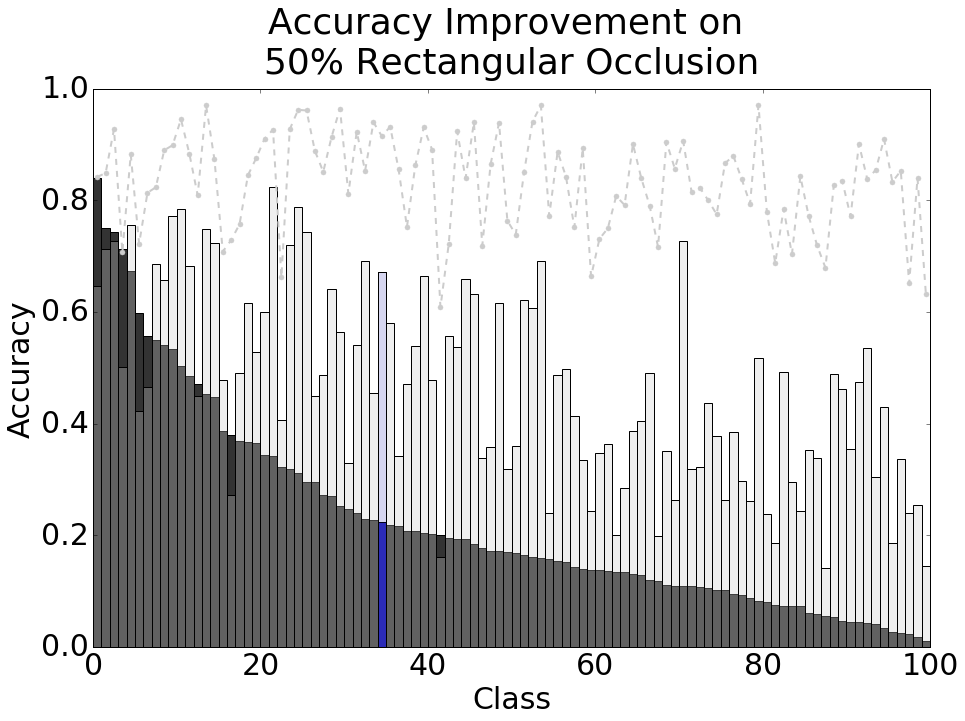

14, 35, 33, 13, 16, 21, 15, 40, 17, 34, 38, 36, 24, 32, 19, 41, 37, 20, 12, 31, 18, 39, 25, 56, 30, 1, 6, 10, 70, 47, 23, 54, 94, 7, 22, 11, 75, 8, 9, 61, 27, 81, 26, 68, 59, 96, 91, 72, 84, 92, 71, 5, 42, 69, 49, 62, 99, 97, 3, 29, 63, 85, 43, 82, 53, 44, 48, 77, 76, 67, 66, 58, 98, 93, 83, 57, 0, 55, 28, 46, 2, 80, 95, 4, 78, 87, 79, 60, 64, 52, 90, 88, 74, 86, 73, 50, 65, 51, 89, 45


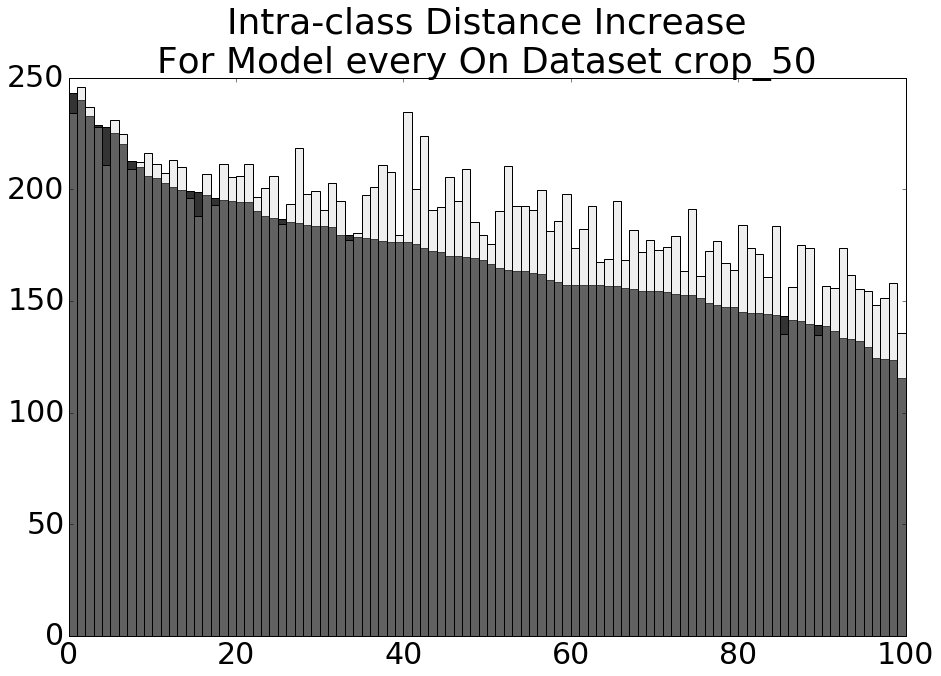

In [13]:
plt.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams.update({'font.size': 30})

colors = [(0,0,0,0.8), (0.8,0.8,0.8,0.3)]

fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0, class_sum])
ax.set_ylim([0, 1])
for model_type_str in model_type_strs:
    for test_type_str in test_type_strs:
        for test_name in test_names:
            # Accuracy increase.
            gap = np.zeros((class_sum, 7)) # 0, all, increase, id, highest (0 on 0)
            for i in range(len(model_names)): # Should be 2.
                config_key = (model_type_str, model_names[i], test_type_str, test_name)
                gap[:, i] = accuracy[config_key]
            gap[:, 2] = gap[:, 1] - gap[:, 0] # Accuracy increase.
            gap[:, 3] = accuracy[(model_type_str, '0', test_type_str, '0')] # Highest possible accuracy.
            gap[:, 4] = range(class_sum)
            point_out = [41]
            gap[:, 5] = [gap[:, 0][i] if i in point_out else 0 for i in range(class_sum)]
            gap[:, 6] = [gap[:, 1][i] if i in point_out else 0 for i in range(class_sum)]
            gap = np.array(sorted(gap, key = lambda k: k[0], reverse = True))
            print gap[:, 2]
            print ', '.join(map(str, map(int, gap[:, 4])))
            plt.bar(range(class_sum), gap[:, 0], color = colors[0], width = 1) # Baseline accuracy.
            plt.bar(range(class_sum), gap[:, 1], color = colors[1], width = 1) # model_all accuracy.
            plt.bar(range(class_sum), gap[:, 5], color = (0,0,1,0.5), width = 1)
            plt.bar(range(class_sum), gap[:, 6], color = (0,0,1,0.1), width = 1)
            plt.plot([i + 0.5 for i in range(class_sum)], gap[:, 3], \
                     color = (0.8, 0.8, 0.8), marker = '.', linestyle = '--',\
                     linewidth = 2.0, markersize = 10.0) # Highest possible accuracy.
            plt.xlabel('Class')
            plt.ylabel('Accuracy')
            plt.title('Accuracy Improvement on \n50% Rectangular Occlusion', y = 1.02)
            plt.show()
            fig.savefig('{}img2vec/plots/accuracy_sorted_{}_{}_{}_{}.png'\
                        .format(result_root, model_type_str, model_name, test_type_str, test_name))
            plt.close()
            
            
            # Intraclass distance.
            gap = np.zeros((class_sum, 4))
            for i in range(len(model_names)): # Should be 2.
                config_key = (model_type_str, model_names[i], test_type_str, test_name)
                gap[:, i] = intraclass_dis[config_key]
            gap[:, 2] = gap[:, 1] - gap[:, 0]
            gap[:, 3] = range(class_sum)
            gap = np.array(sorted(gap, key = lambda k: k[0], reverse = True))
            print ', '.join(map(str, map(int, gap[:, 3])))
            plt.bar(range(class_sum), gap[:, 0], color = colors[0], width = 1)
            plt.bar(range(class_sum), gap[:, 1], color = colors[1], width = 1)
            #plt.xticks(range(class_sum), gap[:, 3])
            plt.title('Intra-class Distance Increase\nFor Model {} On Dataset {}_{}'\
                      .format(model_type_str, test_type_str, test_name))
            plt.show()
            fig.savefig('{}img2vec/plots/intraclass_distance_sorted_{}_{}_{}_{}.png'\
                        .format(result_root, model_type_str, model_name, test_type_str, test_name))
            plt.close()
            

In [48]:
import random
import matplotlib

a = range(1000)
sample = sorted(random.sample(a, 200))
print sample


[4, 6, 8, 9, 12, 14, 17, 19, 25, 37, 41, 46, 54, 57, 58, 62, 65, 68, 70, 86, 93, 100, 108, 137, 141, 144, 146, 155, 158, 162, 168, 171, 176, 177, 181, 184, 194, 196, 199, 204, 210, 215, 217, 218, 226, 229, 231, 236, 238, 239, 246, 248, 249, 281, 287, 304, 308, 309, 310, 311, 312, 318, 328, 331, 339, 340, 341, 346, 355, 361, 362, 379, 383, 384, 386, 387, 388, 389, 394, 399, 400, 404, 431, 440, 442, 447, 450, 452, 453, 462, 466, 473, 477, 481, 483, 484, 489, 490, 495, 498, 499, 501, 502, 504, 506, 507, 516, 517, 521, 523, 524, 529, 536, 537, 538, 543, 544, 545, 576, 577, 590, 592, 596, 599, 603, 604, 610, 615, 616, 618, 620, 621, 628, 634, 636, 641, 645, 647, 648, 654, 655, 660, 661, 662, 665, 675, 682, 685, 689, 693, 694, 695, 697, 702, 703, 705, 706, 708, 709, 713, 722, 723, 724, 727, 733, 735, 737, 752, 756, 763, 765, 773, 782, 788, 795, 797, 833, 837, 847, 848, 857, 862, 870, 871, 874, 875, 889, 890, 894, 906, 907, 908, 910, 913, 916, 927, 934, 975, 979, 997]


In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)

vec = {}

for model_type_str in model_type_strs:
    for model_name in model_names:
        for test_type_str in test_type_strs:
            for test_name in test_names:
                config_key = (model_type_str, model_name, test_type_str, test_name)
                
                vec[config_key] = [[] for i in range(class_sum)]
                
                for label in range(class_sum):
                    for i in range(len(vector_data[config_key][label])):
                        vector, predict_id, index_in_lmdb = vector_data[config_key][label][i]
                        vec[config_key][label].append(np.array(vector))
                        
                mean_of_all = [np.array(vec[config_key][label]).mean() for label in range(class_sum)]
                
                ax = plt.gca()
                ax.set_xlim([-10, 110])
                ax.set_ylim([-10, 15])
                plt.plot(range(class_sum), mean_of_all)
                    
                

